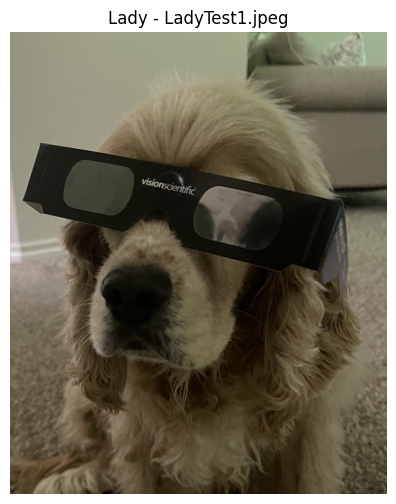

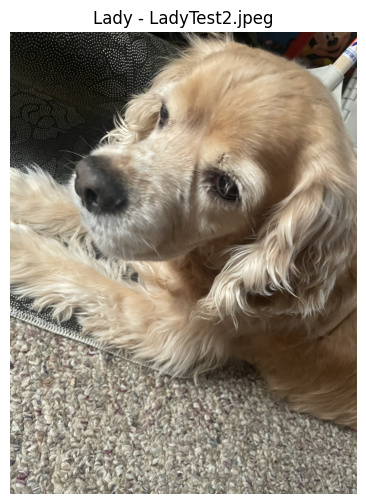

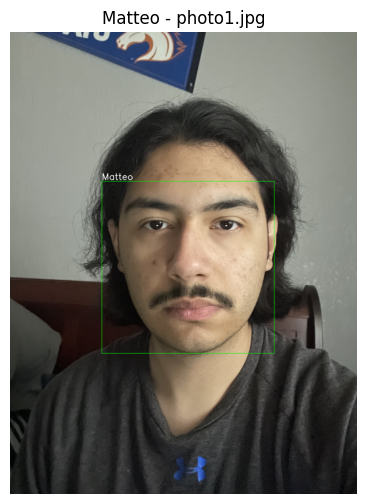

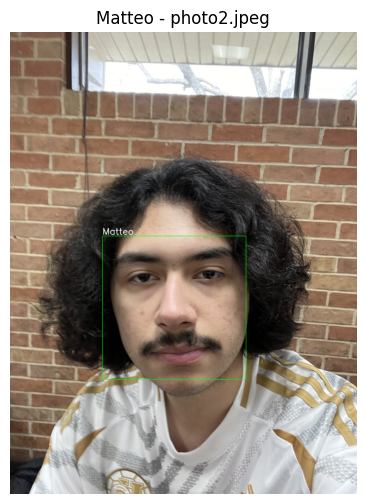

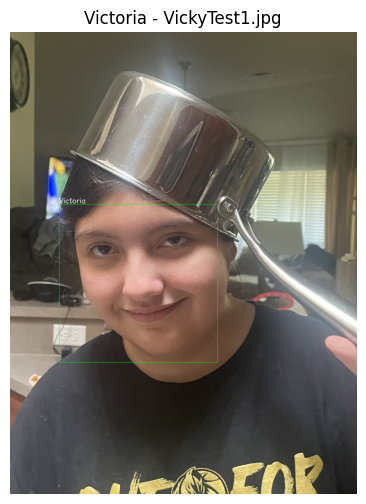

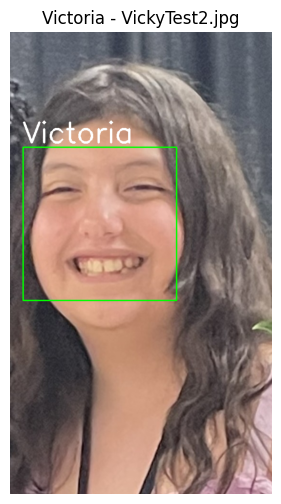

In [2]:
import os
import cv2
import numpy as np
import face_recognition
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

# Set the dataset path
dataset_path = "dataset"

# Load known faces
known_encodings = []
known_names = []

for person_name in os.listdir(dataset_path):
    person_dir = os.path.join(dataset_path, person_name)

    if not os.path.isdir(person_dir) or person_name.startswith('.'):
        continue

    for filename in os.listdir(person_dir):
        image_path = os.path.join(person_dir, filename)
        if not os.path.isfile(image_path) or filename.startswith('.'):
            continue

        image = face_recognition.load_image_file(image_path)
        encodings = face_recognition.face_encodings(image)
        if encodings:
            known_encodings.append(encodings[0])
            known_names.append(person_name)

# Test recognition
for person_name in os.listdir(dataset_path):
    person_dir = os.path.join(dataset_path, person_name)

    if not os.path.isdir(person_dir) or person_name.startswith('.'):
        continue

    for filename in os.listdir(person_dir):
        image_path = os.path.join(person_dir, filename)
        if not os.path.isfile(image_path) or filename.startswith('.'):
            continue

        # Load and auto-correct image orientation
        pil_image = Image.open(image_path)
        pil_image = ImageOps.exif_transpose(pil_image)
        rgb_image = np.array(pil_image)  # Already RGB

        face_locations = face_recognition.face_locations(rgb_image)
        face_encodings = face_recognition.face_encodings(rgb_image, face_locations)

        for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
            matches = face_recognition.compare_faces(known_encodings, face_encoding)
            name = "Unknown"
            if True in matches:
                best_match_index = np.argmin(face_recognition.face_distance(known_encodings, face_encoding))
                name = known_names[best_match_index]

            # Draw bounding box and name (white text, larger font size)
            cv2.rectangle(rgb_image, (left, top), (right, bottom), (0, 255, 0), 2)
            cv2.putText(rgb_image, name, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 4)

        # Show the image
        plt.figure(figsize=(6, 6))
        plt.imshow(rgb_image)
        plt.axis('off')
        plt.title(f"{person_name} - {filename}")
        plt.show()
